In [1]:
#importing the libraries
from fastai2.vision.all import *

In [151]:
# downloading tiny trining images
path = untar_data(URLs.COCO_TINY)
Path.BASE_PATH = path
path.ls()

(#2) [Path('train'),Path('train.json')]

In [152]:
# lets check what is there in the floder train
(path/'train').ls()

(#200) [Path('train/000000285170.jpg'),Path('train/000000540203.jpg'),Path('train/000000032183.jpg'),Path('train/000000297116.jpg'),Path('train/000000455649.jpg'),Path('train/000000403910.jpg'),Path('train/000000277390.jpg'),Path('train/000000434787.jpg'),Path('train/000000087738.jpg'),Path('train/000000139333.jpg')...]

In [157]:
# create list of path for all images
images_path = get_image_files(path/'train')
images_path[:5]

(#5) [Path('train/000000285170.jpg'),Path('train/000000540203.jpg'),Path('train/000000032183.jpg'),Path('train/000000297116.jpg'),Path('train/000000455649.jpg')]

In [156]:
# lets open train.json file
f = open(path/'train.json')
data = json.load(f)
images_info = pd.DataFrame(data['images'])
images_info.head()

,id,file_name
0,542959,000000542959.jpg
1,129739,000000129739.jpg
2,153607,000000153607.jpg
3,329258,000000329258.jpg
4,452866,000000452866.jpg


## Lets open annotations file

In [158]:
path = Path('storage/data/annotations/')
Path.BASE_PATH = path
path.ls()

(#8) [Path('instances_train2017.json'),Path('person_keypoints_train2017.json'),Path('captions_val2017.json'),Path('coco_tiny'),Path('captions_train2017.json'),Path('instances_val2017.json'),Path('train.json'),Path('person_keypoints_val2017.json')]

In [159]:
# training set annonations
f = open(path/'captions_train2017.json')
data = json.load(f)

In [160]:
# containg image_id and corresponding captions
captions = pd.DataFrame(data['annotations'])

In [161]:
captions.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wheel.
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind a legally parked car
3,106140,98,A large passenger airplane flying through the air.
4,106140,101,There is a GOL plane taking off in a partly cloudy sky.


In [162]:
# shape of the captions
captions.shape

(591753, 3)

In [163]:
# unique image_id 
captions.image_id.nunique()

118287

**Since there are only 118287 unique image id from the 591753 image id which implies for every unique image id there are 5 unique captions**

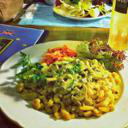

In [168]:
# open a random image
img = Image.open(images_path[2])
img

In [172]:
# what is the image_id of this image
train[train.file_name==images_path[2].name].id

114    32183
Name: id, dtype: int64

In [174]:
# captions of this image
captions.loc[captions['image_id']==32183].caption

576119                                       A white plate topped with different types of food.
576653                                                  Pasta salas with herbs on a white plate
576670    a plate of food is on a white, round plate that is on a table top with another plate.
576737                                           A plate of food at a meal shared with a friend
576801                       There is a large white plate of food that is topped with mushrooms
Name: caption, dtype: object